Canvas(height=200, width=200)

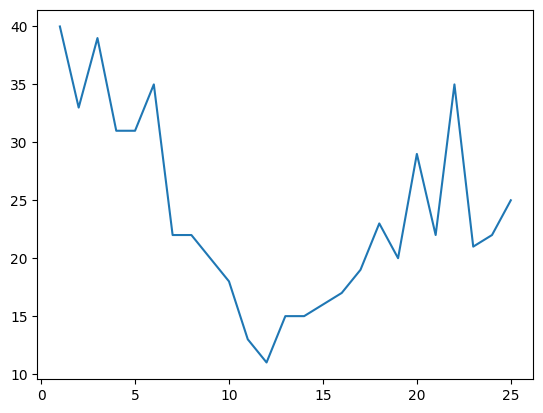

In [3]:
from ipycanvas import Canvas, hold_canvas
import random
import time
import matplotlib.pyplot as plt

cell_pixel_size = 20
width = 10
height = 10
threshold = 10
num_threshold_bases = 25

canvas = Canvas(width=width*cell_pixel_size, height=height*cell_pixel_size)
display(canvas)


def populate(width, height):
    world = []
    for i in range(height):
        a = []
        for j in range(width):
            a.append(random.randint(0, 1))
        world.append(a)
    
    return world


def alive_next_generation(neighborhood):
    num_of_neighbors = sum(sum(column) for column in neighborhood) - neighborhood[1][1]


    # 1: En levende celle med færre enn to naboer dør av "ensomhet"
    if neighborhood[1][1] == 1 and num_of_neighbors < 2:
        return False

    # 2: En levende celle med to eller tre naboer overlever til neste generasjon.
    if neighborhood[1][1] == 1 and (num_of_neighbors == 2 or num_of_neighbors == 3):
        return True

    # 3: En levende celle med flere enn tre naboer dør av "ressursmangel"
    if neighborhood[1][1] == 1 and num_of_neighbors > 3:
        return False

    # 4: Det oppstår liv i en celle uten liv hvis den har nøyaktig tre naboer.
    if neighborhood[1][1] == 0 and num_of_neighbors == 3:
        return True


def next_generation(world):
    new_world = [[cell for cell in row] for row in world]
    for i in range(height):
        for j in range(width):
            statement = alive_next_generation(find_neighborhood(world, i, j))
            if statement:
                new_world[i][j] = 1
            else:
                new_world[i][j] = 0
    return new_world


def find_neighborhood(world, y, x):
    global height
    global width
    neighborhood = []
    for i in range(y - 1, y + 2):
        a = []
        for j in range(x - 1, x + 2):
            if i >= height and j >= width:
                a.append(world[0][0])
            elif i >= height:
                a.append(world[0][j])
            elif j >= width:
                a.append(world[i][0])
            else:
                a.append(world[i][j])
        neighborhood.append(a)
    return neighborhood


def population(world):
    global height
    global width
    s = 0
    for _ in world:
        s += sum(_)
    return s


world = populate(width, height)
delta_population = 0
prev_population = 0
delta_list = []
generations = []
population_generations = []
d = 0

for i in range(num_threshold_bases):
    delta_list.append(num_threshold_bases*10)

while sum(delta_list)/num_threshold_bases >= threshold:
    d += 1
    with hold_canvas():
        # # Draw canvas
        canvas.clear()

        for i in range(height):
            for j in range(width):
                if world[i][j] == 1:
                    canvas.fill_style = "black"
                    canvas.fill_rect(cell_pixel_size*j, cell_pixel_size*i, cell_pixel_size)
                else:
                    continue
        # time.sleep(1/1000)
    
    world = next_generation(world)
    population_generations.append(population(world))
    delta_population = abs(population_generations[-1] - population_generations[len(population_generations) - 2])
    delta_list.pop(0)
    delta_list.append(delta_population)
    generations.append(d)
    
plt.plot(generations, population_generations)
plt.show()

    